In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_excel(r"C:\Users\ankit\Python Project\Helth insurance project\premiums_old.xlsx")

In [3]:
df.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.shape

(29904, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    29904 non-null  int64 
 1   Gender                 29904 non-null  object
 2   Region                 29904 non-null  object
 3   Marital_status         29904 non-null  object
 4   Number Of Dependants   29904 non-null  int64 
 5   BMI_Category           29904 non-null  object
 6   Smoking_Status         29895 non-null  object
 7   Employment_Status      29903 non-null  object
 8   Income_Level           29895 non-null  object
 9   Income_Lakhs           29904 non-null  int64 
 10  Medical History        29904 non-null  object
 11  Insurance_Plan         29904 non-null  object
 12  Annual_Premium_Amount  29904 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


In [7]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,29904.000000,29904.000000,29904.000000,29904.000000
mean,43.396536,2.380116,23.362059,20893.036684
std,13.411893,1.431140,24.737076,6935.844219
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15698.000000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [8]:
df.columns=df.columns.str.replace(" ","_").str.lower()

In [9]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [10]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

## Handling nulls and duplicates

In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [15]:
df[df.number_of_dependants<0]["number_of_dependants"].value_counts()

number_of_dependants
-1    30
-3    20
Name: count, dtype: int64

In [16]:
df.number_of_dependants=np.abs(df.number_of_dependants)

In [17]:
df.number_of_dependants.describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

# Outlier Treatment

In [18]:
def bplot(data):

    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR

    
    sns.boxplot(data)
    plt.axhline(lower, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(upper, color='blue', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.show()

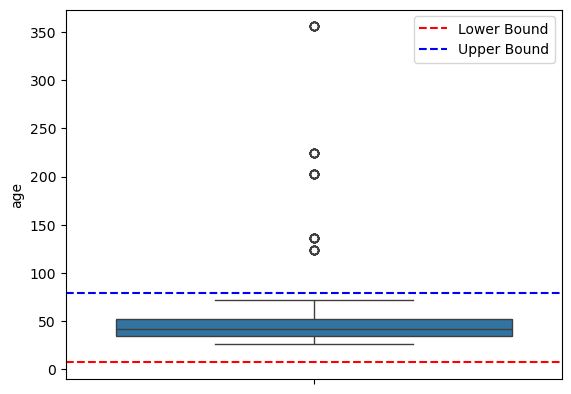

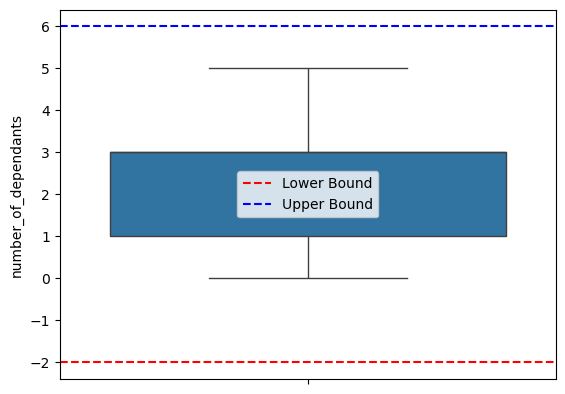

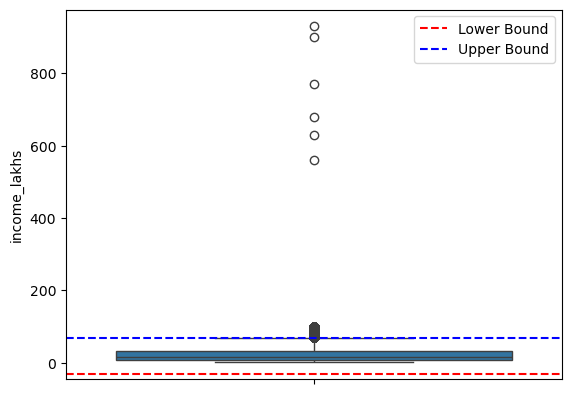

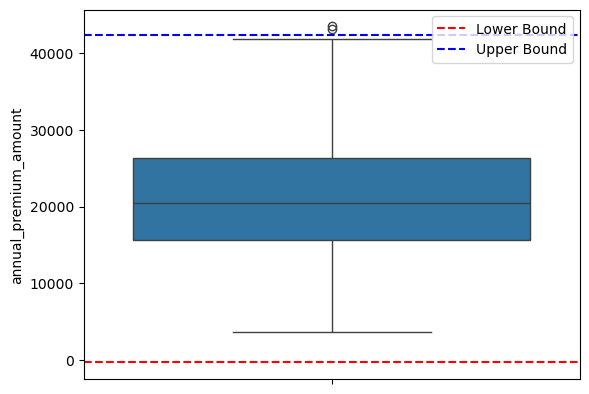

In [19]:
for c in df.select_dtypes([float,int]).columns:
    bplot(df[c])

In [20]:
df1=df[df.age<=100].copy()

# univariate analysis

<Axes: xlabel='income_lakhs', ylabel='Count'>

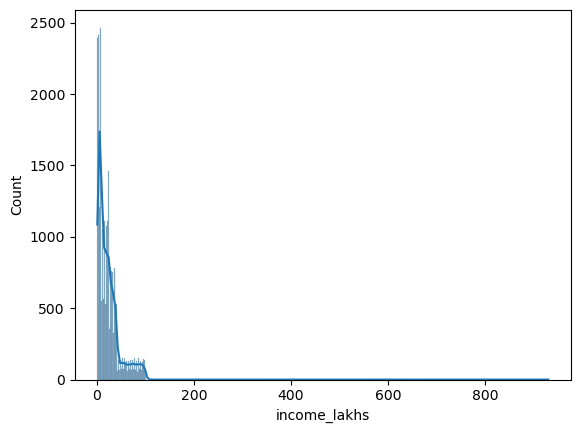

In [21]:
sns.histplot(df1.income_lakhs,kde=True)

In [22]:
def iqr_bounds(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    return upper,lower

In [23]:
df2=df1[df1.income_lakhs<=df1.income_lakhs.quantile(0.999)].copy()

In [24]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29822.000000,29822.000000,29822.000000,29822.000000
mean,43.094896,2.387734,23.226343,20900.689223
std,11.042430,1.420644,22.455408,6928.192115
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15705.250000
50%,42.000000,3.000000,17.000000,20495.500000
75%,52.000000,3.000000,32.000000,26360.000000
max,72.000000,5.000000,100.000000,43471.000000


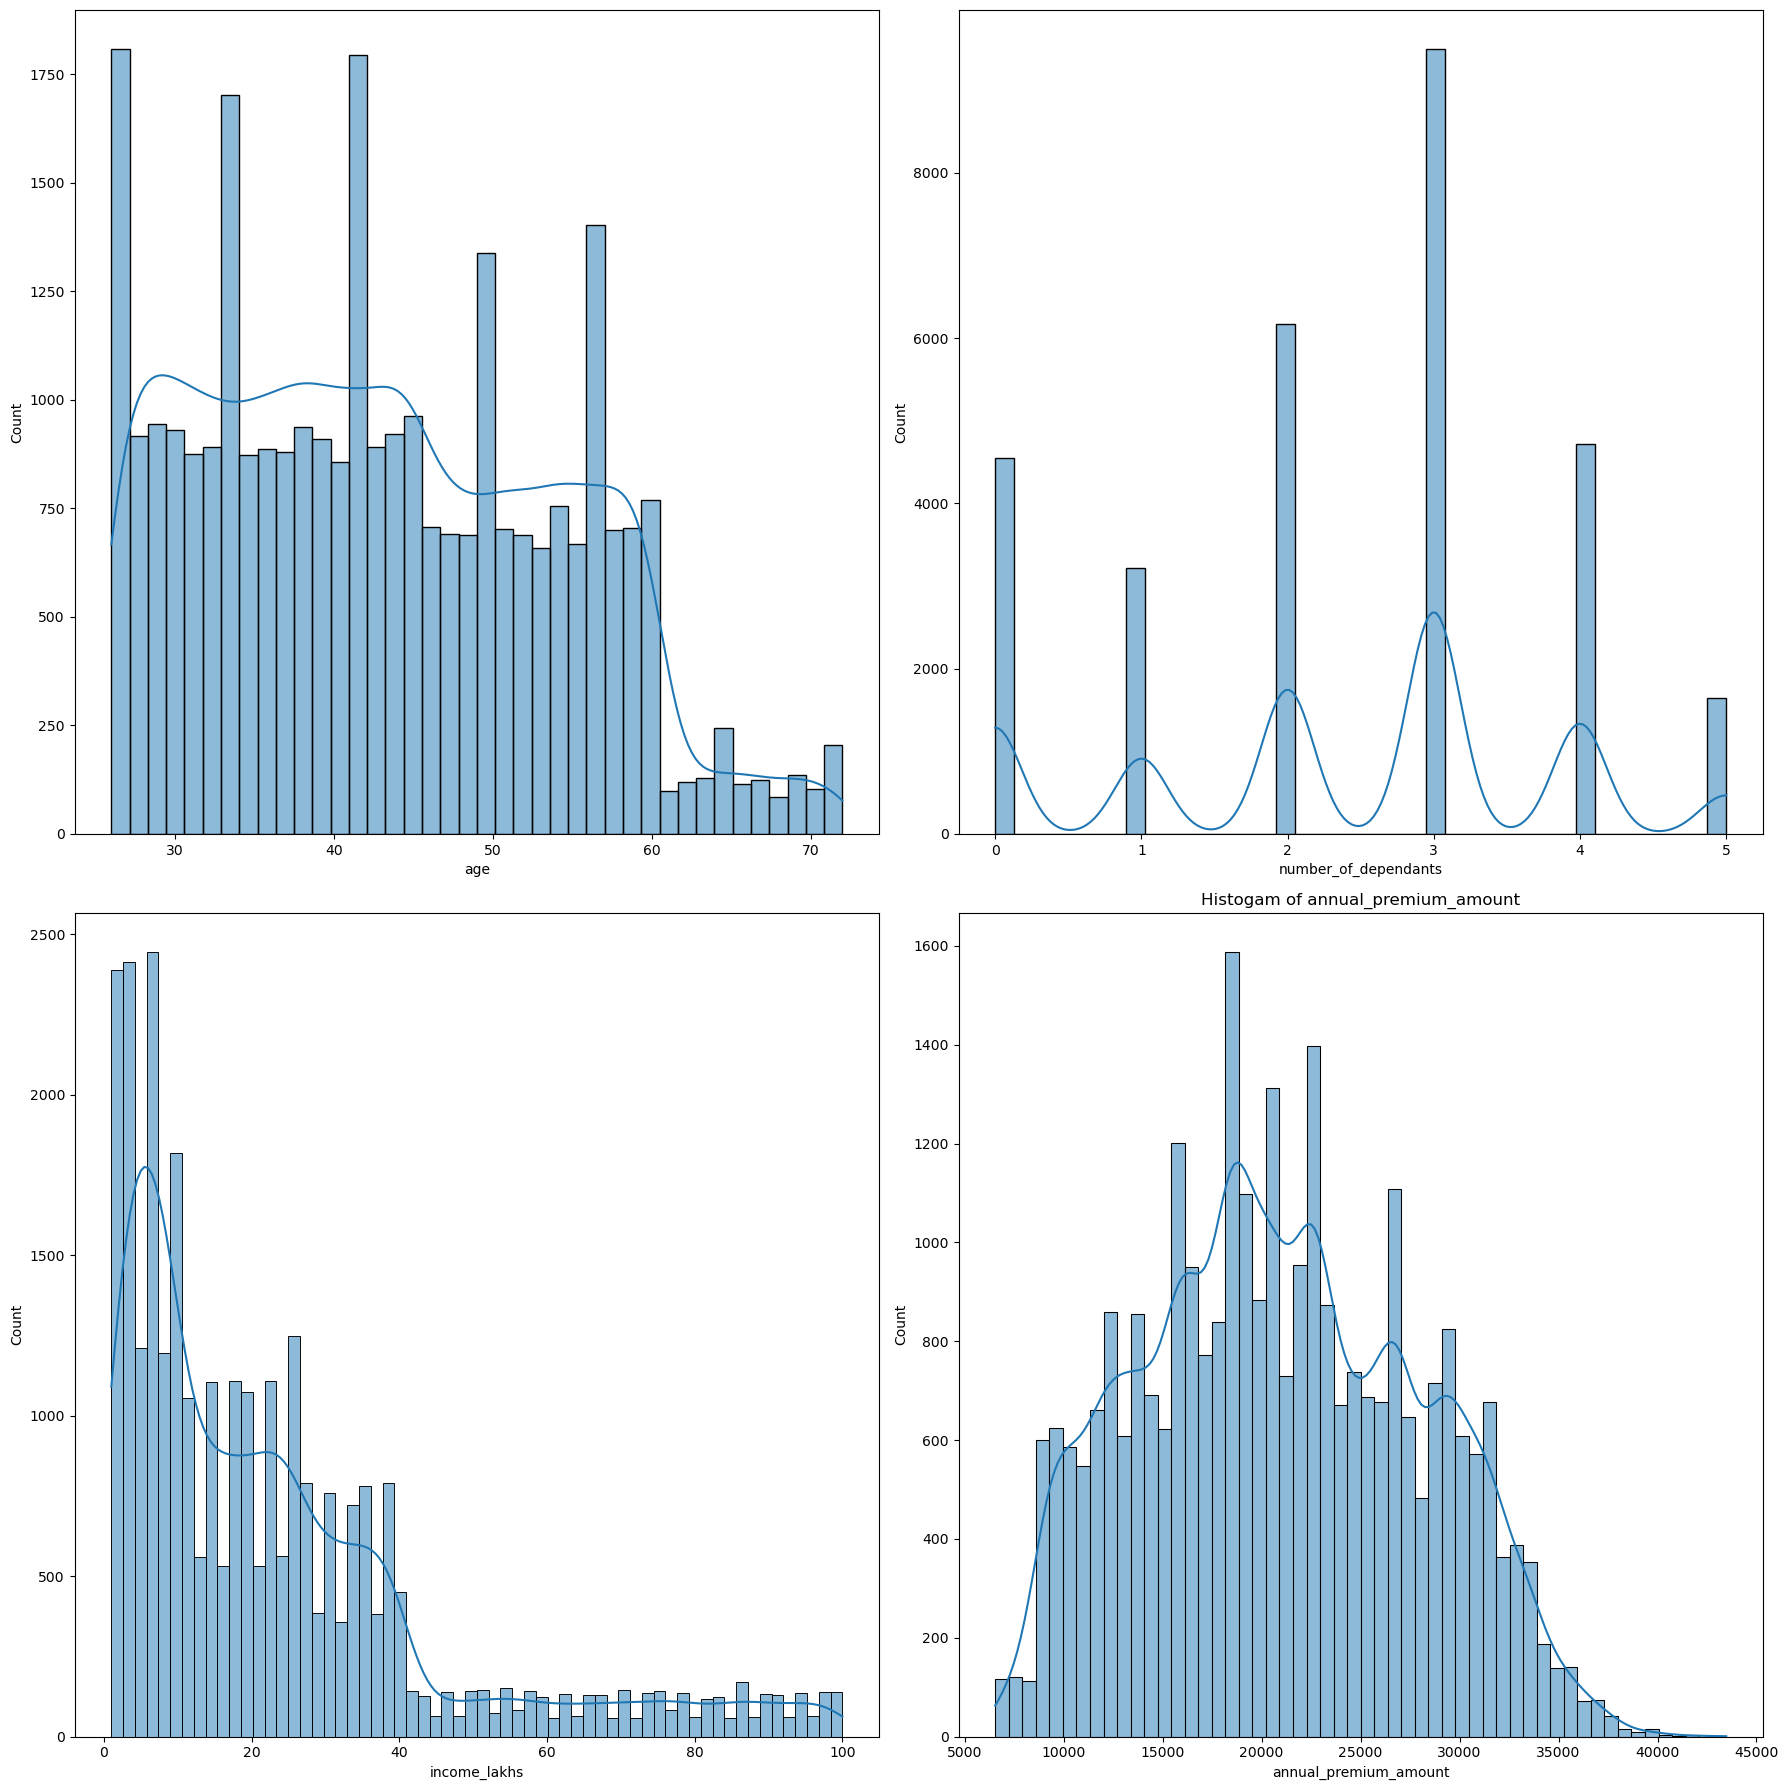

In [25]:
fig,axes=plt.subplots(2,2,figsize=(18,18))
axes=axes.flatten()



for ax,col in zip(axes,df2.select_dtypes([float,int]).columns):
    
    
    plt.title(f"Histogam of {col}")
    sns.histplot(df2[col],kde=True,ax=ax)
    
plt.tight_layout()    
plt.show()
    

# Bivariate analysis

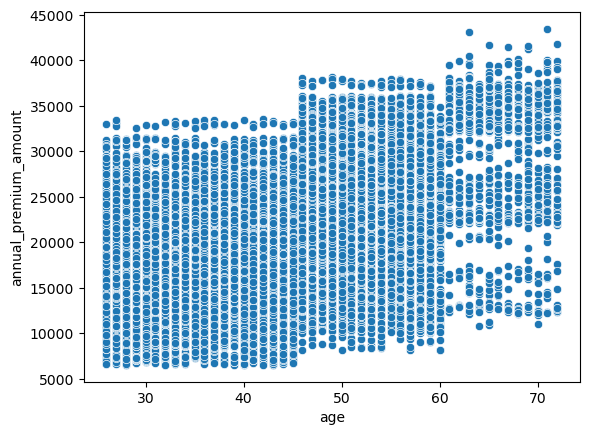

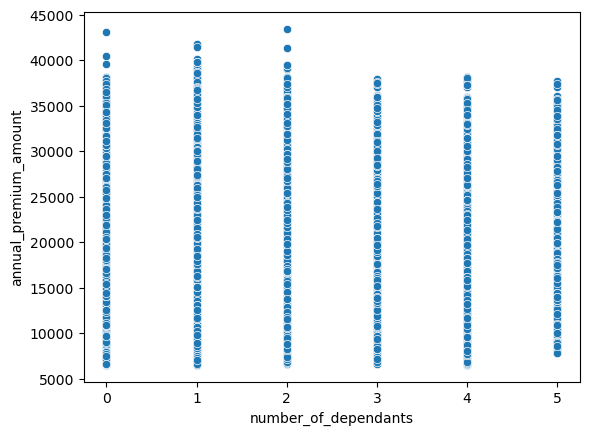

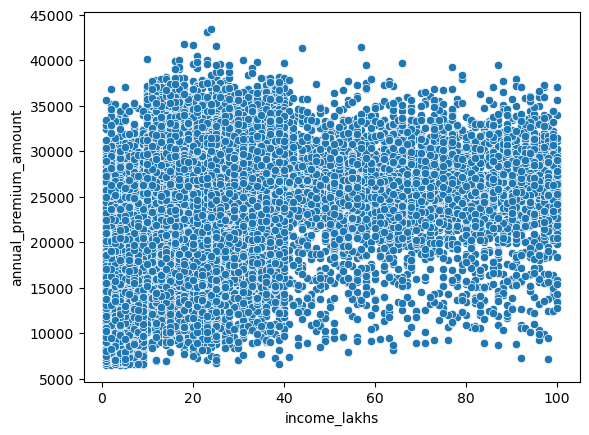

In [26]:
for col in df2.select_dtypes([float,int]).columns:
    if col=="annual_premium_amount":
        continue
    sns.scatterplot(x=df2[col],y=df2.annual_premium_amount)
    plt.show()

In [27]:
for col in df2.select_dtypes('object').columns:
    print(f"{col}:",df2[col].unique())
    

gender: ['Male' 'Female']
region: ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status: ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status: ['Salaried' 'Self-Employed' 'Freelancer']
income_level: ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history: ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan: ['Bronze' 'Silver' 'Gold']


In [28]:
df2["smoking_status"]=df2["smoking_status"].replace({'Smoking=0':'No Smoking',
                                   'Does Not Smoke':'No Smoking',
                                   'Not Smoking':'No Smoking'}
                                   )
    

In [29]:
pct_count=df2["gender"].value_counts(normalize=True)

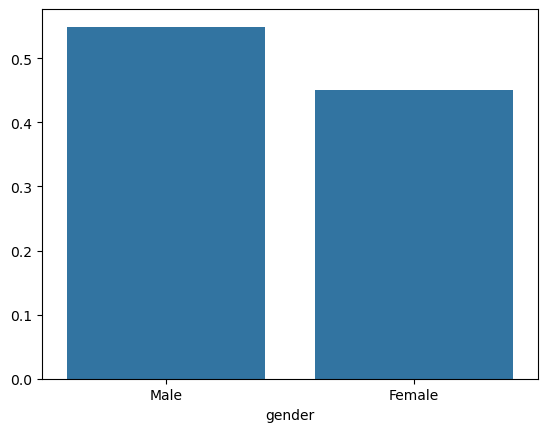

In [30]:
sns.barplot(x=pct_count.index,y=pct_count.values)
plt.show()

In [31]:
len(df2.select_dtypes('object').columns)

9

In [32]:
categorical_column=df2.select_dtypes(object).columns
categorical_column

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

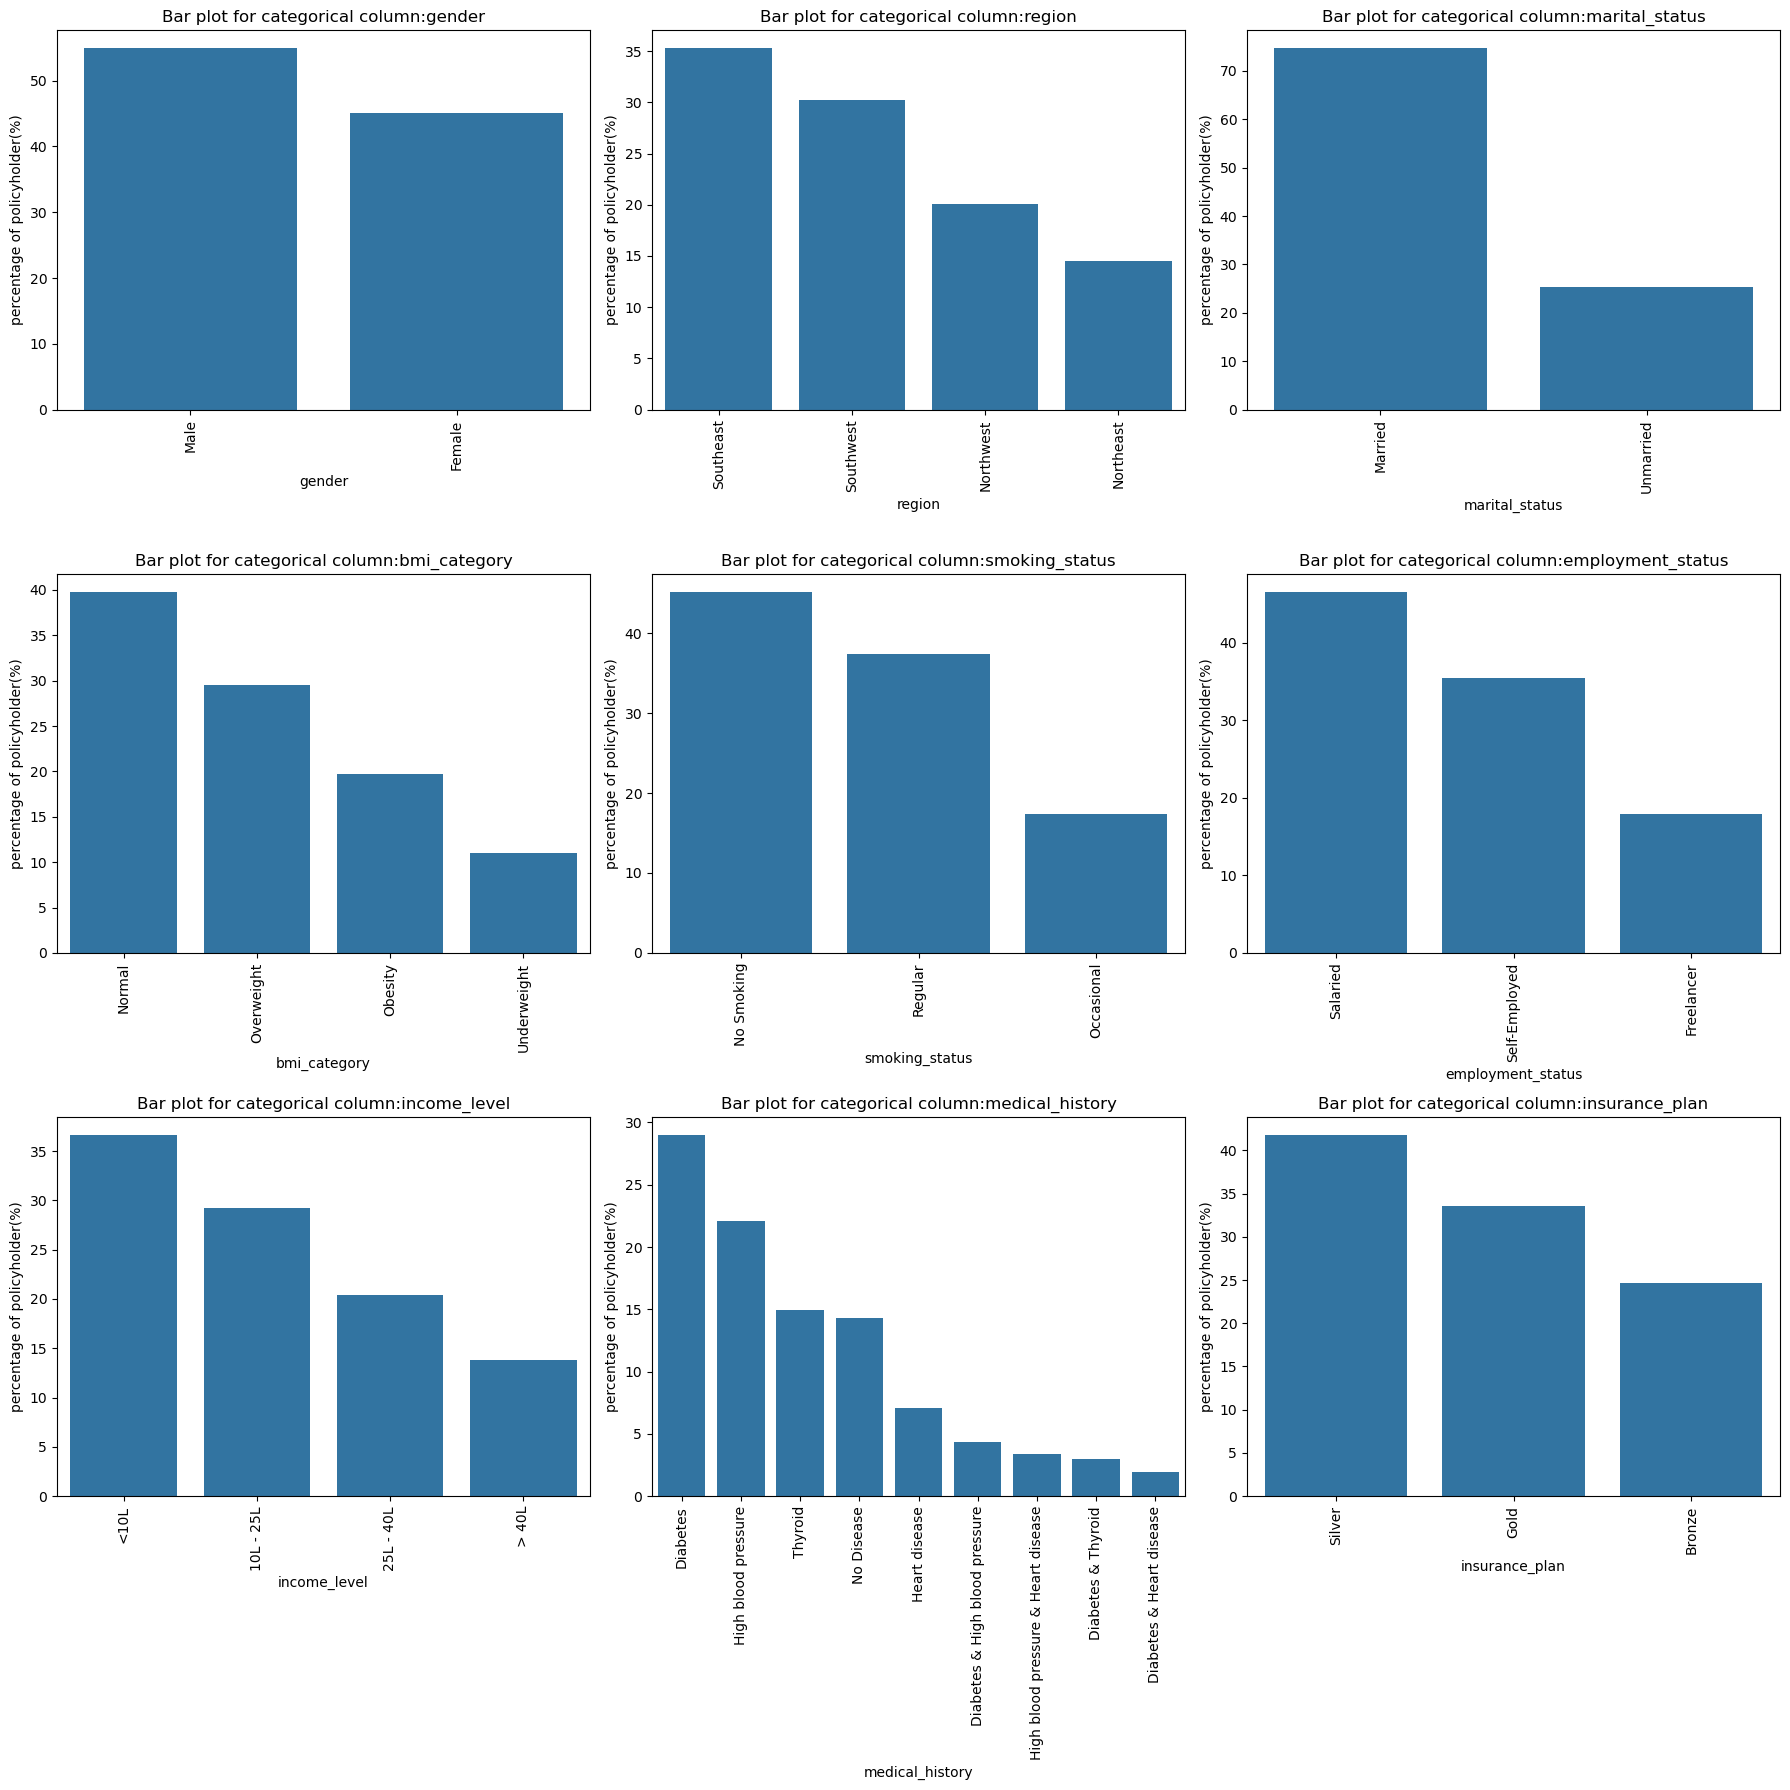

In [33]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
axes=axes.flatten()

for ax,column in zip(axes,categorical_column):
    category_count=df2[column].value_counts(normalize=True)*100
    
    sns.barplot(x=category_count.index,y=category_count.values,ax=ax)
    ax.set_title(f"Bar plot for categorical column:{column}")
    ax.set_ylabel("percentage of policyholder(%)")
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=90)
    

plt.tight_layout()
plt.show()

In [34]:
crosstab=pd.crosstab(df2["income_level"],df2["insurance_plan"])

In [35]:
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


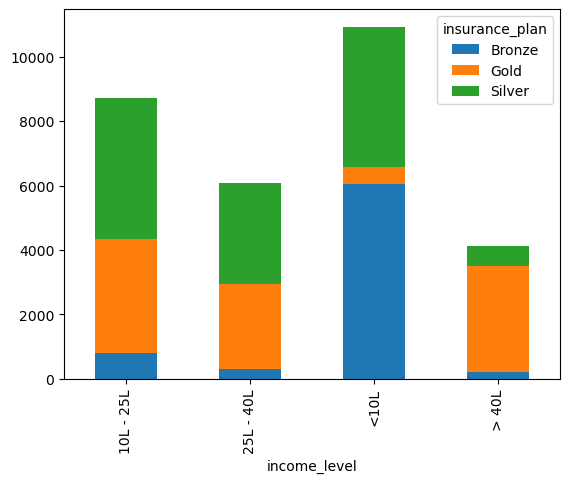

In [36]:
crosstab.plot(kind='bar',stacked=True)
plt.show()

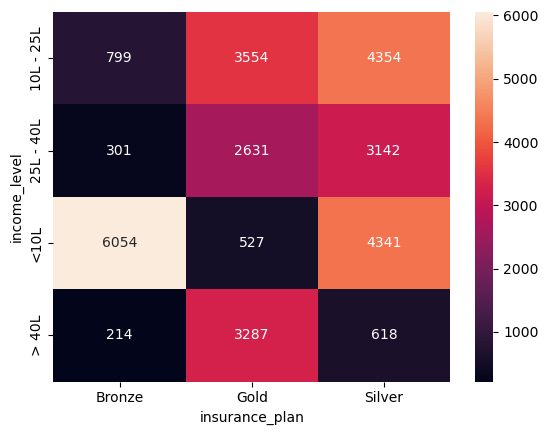

In [37]:
sns.heatmap(crosstab,annot=True,fmt='d')
plt.show()

In [38]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [39]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

# Feature Engineering

In [40]:
risk_score={
    'diabetes':6,
    'high blood pressure':6,
    'no disease':0,
    'thyroid':5,
    'heart disease':8,
    'none':0
}
df2[["disease1","disease2"]]=df2.medical_history.str.split("&",expand=True).apply(lambda x:x.str.lower().str.strip().fillna('none'))

In [41]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
25681,43,Female,Southwest,Married,5,Normal,No Smoking,Salaried,<10L,1,High blood pressure,Bronze,8716,high blood pressure,none
8846,49,Female,Southeast,Married,3,Overweight,No Smoking,Self-Employed,25L - 40L,35,High blood pressure,Gold,29067,high blood pressure,none
17240,33,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,<10L,9,Diabetes,Bronze,8790,diabetes,none
2485,40,Male,Southeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,58,Diabetes & High blood pressure,Gold,28998,diabetes,high blood pressure
15381,32,Male,Southwest,Married,4,Obesity,No Smoking,Self-Employed,25L - 40L,32,No Disease,Silver,17453,no disease,none


In [42]:
df2["total_risk_score"]=df2['disease1'].map(risk_score)+df2['disease2'].map(risk_score)
df2['normalised_risk_score']=(df2["total_risk_score"]-df2['total_risk_score'].min())/(df2["total_risk_score"].max()-df2["total_risk_score"].min())

In [43]:
df2.sample(5)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
23869,59,Male,Southwest,Married,5,Overweight,Regular,Self-Employed,<10L,3,No Disease,Bronze,13338,no disease,none,0,0.000000
22997,30,Male,Southeast,Married,3,Normal,Regular,Salaried,> 40L,49,Thyroid,Gold,25278,thyroid,none,5,0.357143
18167,39,Male,Southeast,Married,3,Normal,Regular,Freelancer,25L - 40L,29,Thyroid,Silver,18853,thyroid,none,5,0.357143
22051,43,Female,Southeast,Married,3,Normal,Regular,Salaried,25L - 40L,35,No Disease,Silver,16549,no disease,none,0,0.000000
27594,26,Female,Northwest,Unmarried,1,Normal,Occasional,Salaried,<10L,7,Diabetes,Gold,23200,diabetes,none,6,0.428571


In [44]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [45]:
df2.insurance_plan=df.insurance_plan.map({'Bronze':1,'Silver':2,'Gold':3})

In [46]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
5967,47,Male,Southwest,Married,3,Overweight,Regular,Self-Employed,> 40L,91,Thyroid,3,31643,thyroid,none,5,0.357143
19155,35,Male,Southeast,Married,2,Underweight,Regular,Salaried,<10L,1,Diabetes,3,25163,diabetes,none,6,0.428571
22521,42,Male,Southwest,Married,4,Overweight,Regular,Salaried,<10L,2,High blood pressure & Heart disease,1,18043,high blood pressure,heart disease,14,1.000000
21760,30,Female,Northwest,Married,4,Obesity,No Smoking,Salaried,<10L,2,High blood pressure,2,20118,high blood pressure,none,6,0.428571
16705,46,Male,Southeast,Unmarried,0,Underweight,No Smoking,Salaried,25L - 40L,32,No Disease,3,24660,no disease,none,0,0.000000


In [47]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [48]:
df2.income_level=df2.income_level.map({'<10L':1, '10L - 25L':2, '> 40L':3, '25L - 40L':4})

In [49]:
nominal_col=['gender', 'region', 'marital_status','bmi_category', 'smoking_status','employment_status']

In [50]:
df3=pd.get_dummies(df2,columns=nominal_col,drop_first=True,dtype=int)

In [51]:
df3.sample(2)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
28894,39,3,4,38,Diabetes,2,15248,diabetes,none,6,...,0,0,0,0,0,0,0,0,1,0
22488,44,2,1,2,Diabetes,2,16634,diabetes,none,6,...,1,0,0,0,0,0,1,0,1,0


In [52]:
df4=df3.drop(["medical_history","disease1","disease2","total_risk_score"],axis=1)

In [53]:
df4.sample(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
6191,54,3,3,41,3,31560,0.428571,1,1,0,0,0,0,1,0,0,1,0,1


<Axes: >

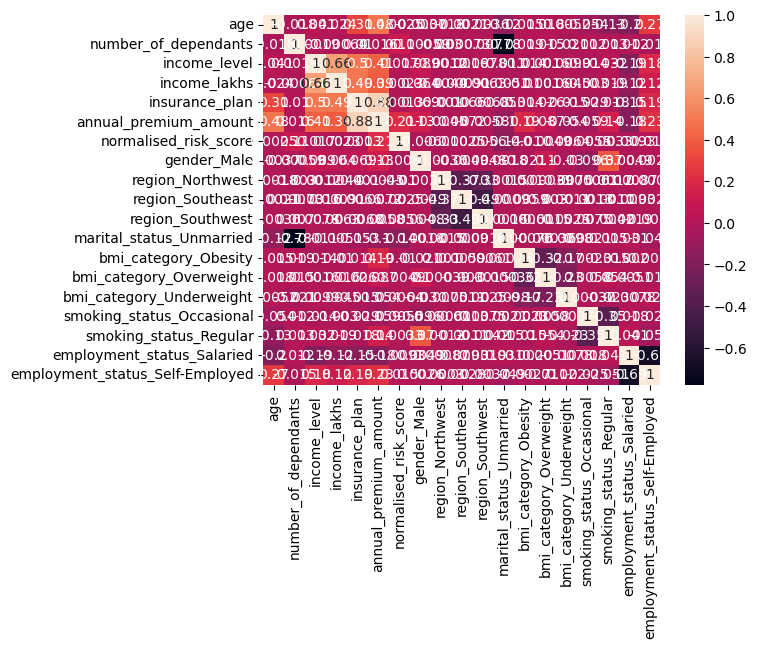

In [58]:
sns.heatmap(df4.corr(),annot=True)

In [59]:
X=df4.drop('annual_premium_amount',axis=1)
y=df4['annual_premium_amount']

In [60]:
X.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [61]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
X[cols_to_scale]=scalar.fit_transform(X[cols_to_scale])

In [62]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.666667,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['column']=data.columns
    vif_df['Vif']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [65]:
calculate_vif(X)

,column,Vif
0,age,3.882319
1,number_of_dependants,6.292550
2,income_level,4.104266
3,income_lakhs,3.797992
4,insurance_plan,4.931114
5,normalised_risk_score,3.815157
6,gender_Male,2.599039
7,region_Northwest,2.124859
8,region_Southeast,2.981854
9,region_Southwest,2.711344


###### we will drop columns only if the vif is greater than 10 and columns are to be dropped one by one and then checked for vif however we are dropping vif to match lecture requirement
| VIF Value  | Interpretation                                | Action Needed?               |
| ---------- | --------------------------------------------- | ---------------------------- |
| **1**      | No multicollinearity                          | ✅ Ideal                      |
| **1 - 5**  | Moderate correlation                          | ✅ Usually okay               |
| **5 - 10** | High correlation (possible multicollinearity) | ⚠️ Investigate further       |
| **> 10**   | Severe multicollinearity                      | ❌ Remove or combine features |


In [66]:
calculate_vif(X.drop("income_level",axis=1))

,column,Vif
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,normalised_risk_score,3.808345
5,gender_Male,2.591439
6,region_Northwest,2.123277
7,region_Southeast,2.979899
8,region_Southwest,2.708641
9,marital_status_Unmarried,2.345757


In [67]:
X_reduced=X.drop('income_level',axis=1)

# Model Training

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=10)

In [69]:
print(f"X_train:{X_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")

X_train:(20875, 17)
X_test:(8947, 17)
y_train:(20875,)
y_test:(8947,)


In [70]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
y_pred=model_lr.predict(X_test)


train_score=model_lr.score(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score,test_score

(0.9534163989489616, 0.9538448451629948)

In [71]:
model_lr.intercept_

5935.981289344589

In [72]:
model_lr.coef_

array([ 7016.23932829, -1311.76470171,  -708.19336921, 14835.98820801,
        6053.6241234 ,    37.55826883,   -55.25087215,   -19.62254288,
         -22.28967559,  -700.32019985,  3926.8127061 ,  1979.45604663,
         612.86623617,   837.3951011 ,  2800.66184334,   -45.49136706,
         243.07842087])

In [73]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalised_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

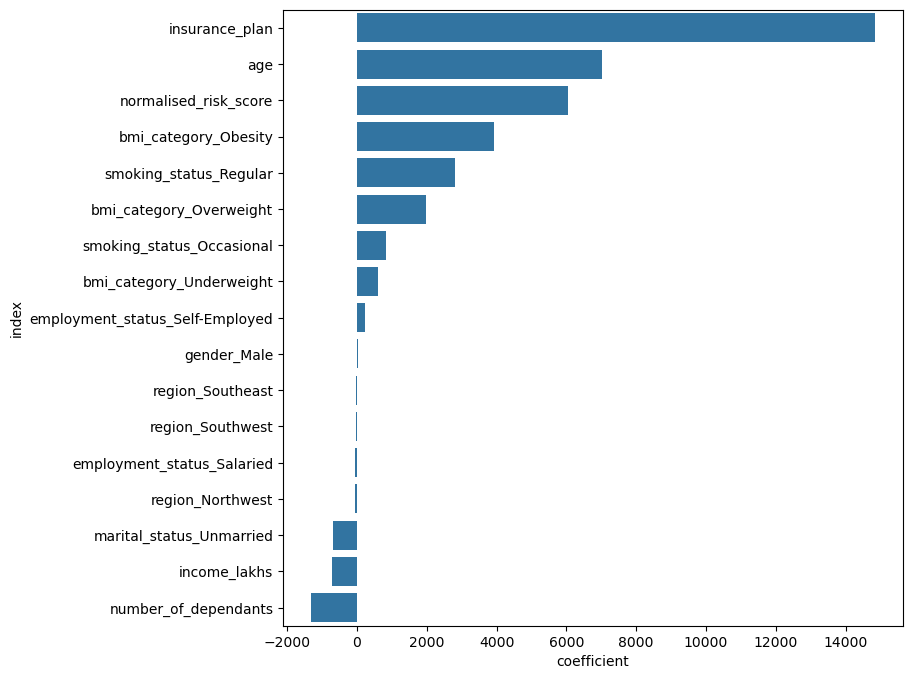

In [74]:
coef_df=pd.DataFrame(model_lr.coef_,X_test.columns,columns=["coefficient"]).reset_index()

coef_df=coef_df.sort_values(by='coefficient',ascending=False)
coef_df


plt.figure(figsize=(8,8))
sns.barplot(x=coef_df["coefficient"],y=coef_df["index"])
plt.show()

In [75]:
model_ridge=Ridge()

In [76]:
model_ridge=Ridge()
model_ridge.fit(X_train,y_train)
train_score=model_ridge.score(X_train,y_train)
test_score=model_ridge.score(X_test,y_test)
train_score,test_score

(0.9534162332209687, 0.9538456995663842)

In [77]:
from xgboost import XGBRegressor

In [78]:
from xgboost import XGBRegressor
model_xg=XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred=model_xg.predict(X_test)
train_score=model_xg.score(X_train,y_train)
test_score=model_xg.score(X_test,y_test)
train_score,test_score

(0.9986370801925659, 0.9979538321495056)

In [79]:
rsme=root_mean_squared_error(y_test,y_pred)

In [80]:
rsme

311.14982789762087

In [81]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
print(np.sqrt(mse))

96814.21540071907
311.14982789762087


In [82]:
model_xgb=XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
    

In [83]:
random_search.fit(X_train,y_train)
random_search.best_score_

0.9979600111643473

In [84]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.2}

In [85]:
best_model=random_search.best_estimator_

In [86]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

In [87]:
best_model.feature_importances_

array([7.1918905e-02, 3.2066302e-05, 1.5494002e-04, 7.6176149e-01,
       4.4709671e-02, 2.4138426e-05, 2.4902896e-05, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 4.1588962e-02, 2.5389295e-02,
       3.1496033e-03, 6.6333059e-03, 4.4578634e-02, 0.0000000e+00,
       3.4007116e-05], dtype=float32)

In [88]:
feature_importance=best_model.feature_importances_
coef_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=["coefficient"]).reset_index()

coef_df=coef_df.sort_values(by='coefficient',ascending=False)
coef_df

,index,coefficient
3,insurance_plan,0.761761
0,age,0.071919
4,normalised_risk_score,0.044710
14,smoking_status_Regular,0.044579
10,bmi_category_Obesity,0.041589
11,bmi_category_Overweight,0.025389
13,smoking_status_Occasional,0.006633
12,bmi_category_Underweight,0.003150
2,income_lakhs,0.000155
16,employment_status_Self-Employed,0.000034


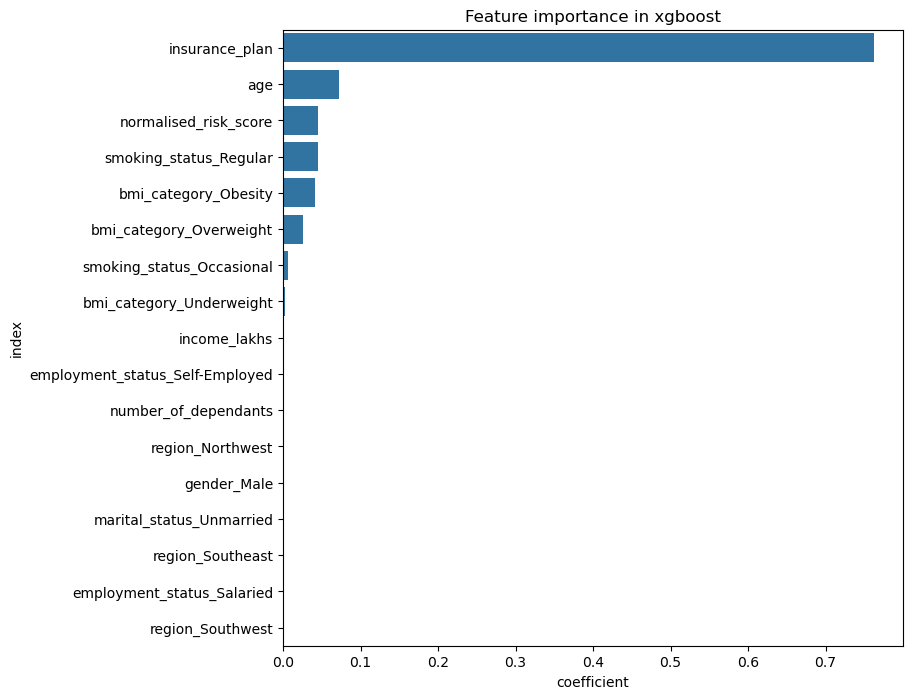

In [89]:
plt.figure(figsize=(8,8))
plt.title("Feature importance in xgboost")
sns.barplot(x=coef_df["coefficient"],y=coef_df["index"])
plt.show()

# Error Analysis

In [90]:
res=pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred,
    
})

In [91]:
res['residuals']=res['y_pred']-res['y_test']
res['residual%']=res['residuals']*100/res['y_test']
res.head()

,y_test,y_pred,residuals,residual%
19713,26895,26611.138672,-283.861328,-1.055443
14750,22734,23093.667969,359.667969,1.582071
19932,21198,21507.083984,309.083984,1.458081
29643,9100,9087.669922,-12.330078,-0.135495
17076,26434,26533.542969,99.542969,0.376572


<Axes: xlabel='residual%', ylabel='Count'>

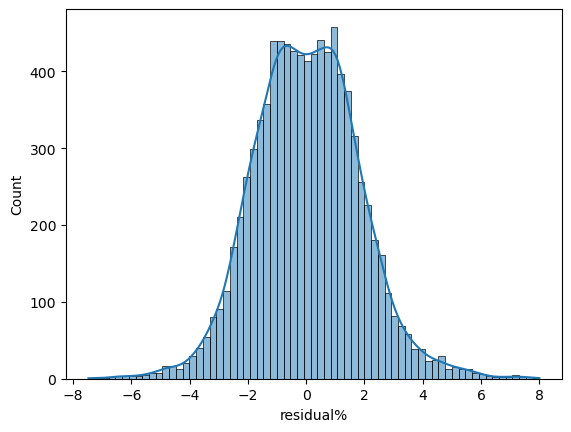

In [92]:
sns.histplot(res['residual%'],kde=True)

In [93]:
extreme_error=10
extreme_error_threshold=res[np.abs(res['residual%'])>extreme_error]

In [94]:
len(extreme_error_threshold)*100/len(res)

0.0

In [95]:
extreme_error=50
extreme_error_threshold=res[np.abs(res['residual%'])>extreme_error]

In [96]:
extreme_error_threshold.sort_values(by='residual%',ascending=False)

,y_test,y_pred,residuals,residual%


In [97]:
extreme_error_threshold.index

Index([], dtype='int64')

In [98]:
extreme_error_df=X_test.loc[extreme_error_threshold.index]

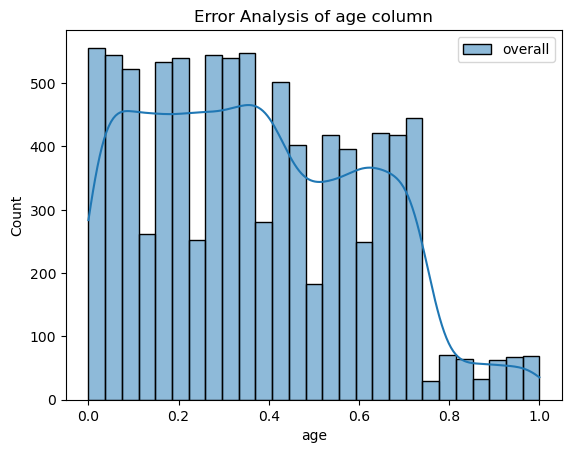

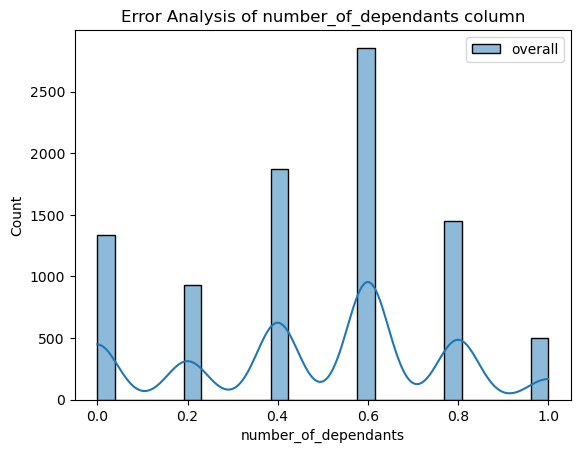

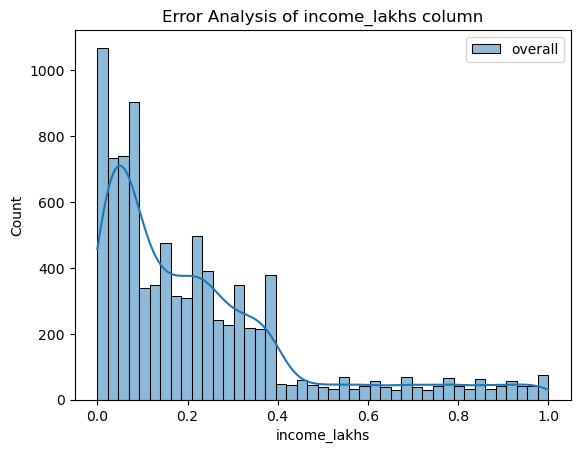

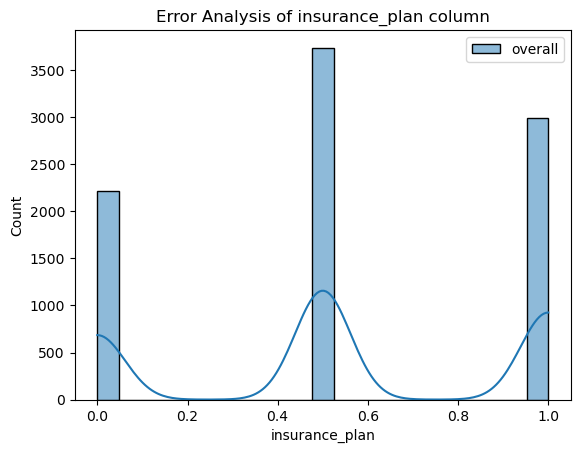

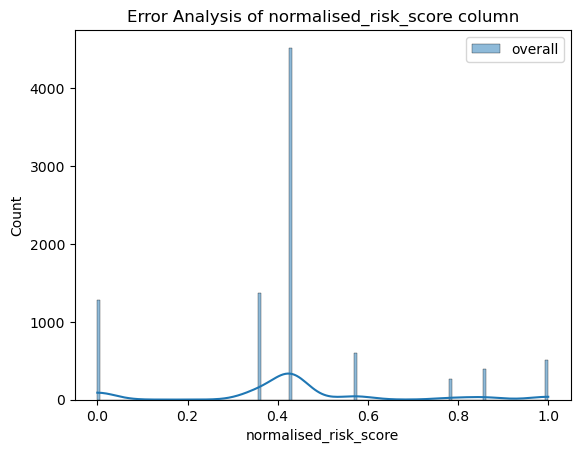

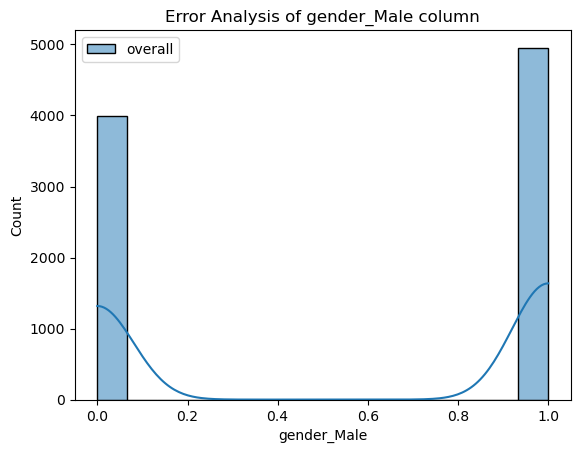

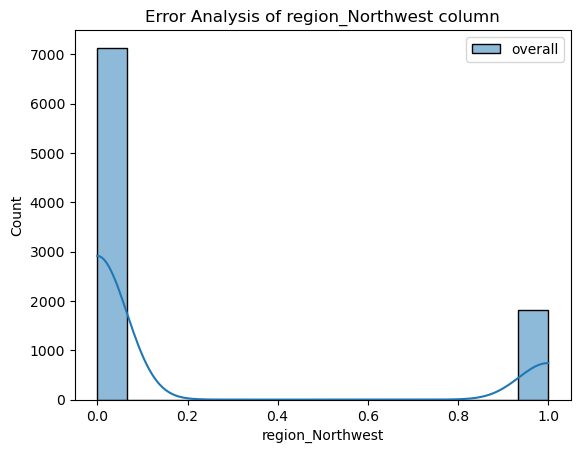

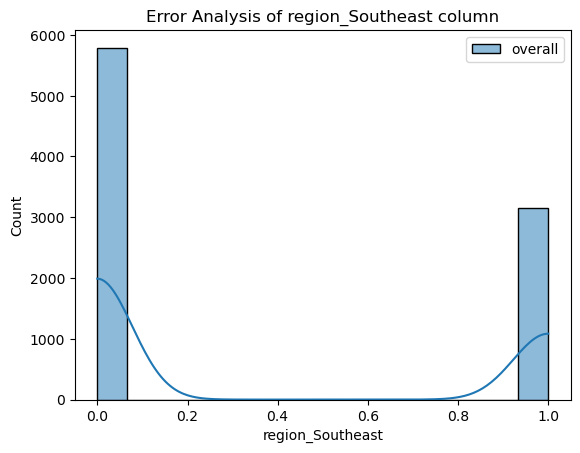

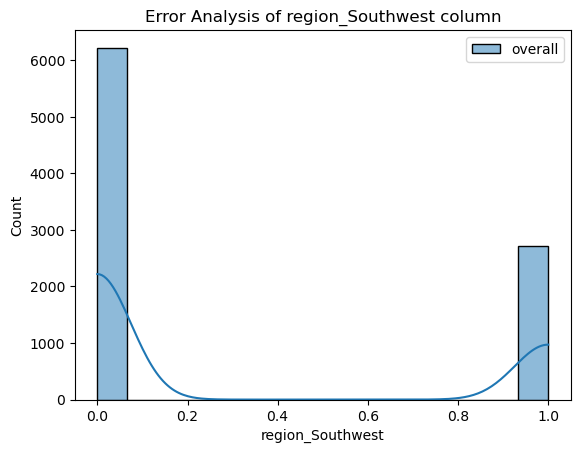

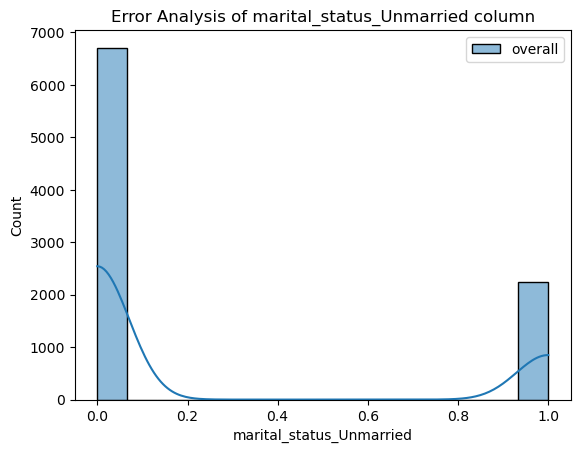

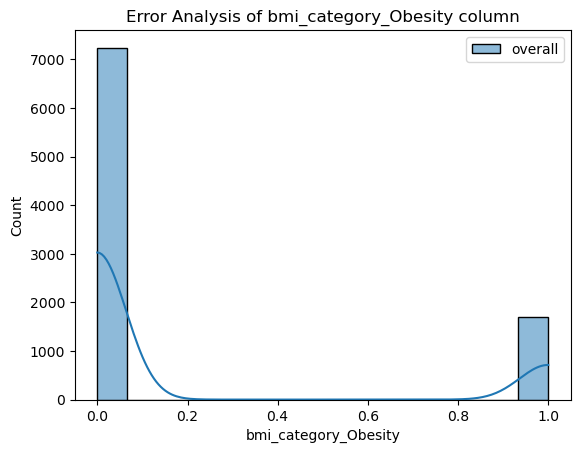

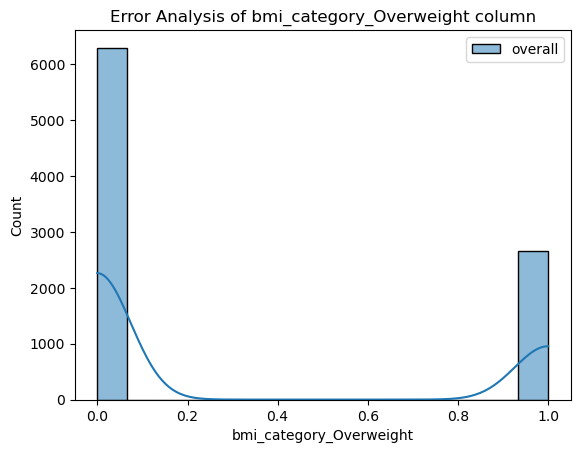

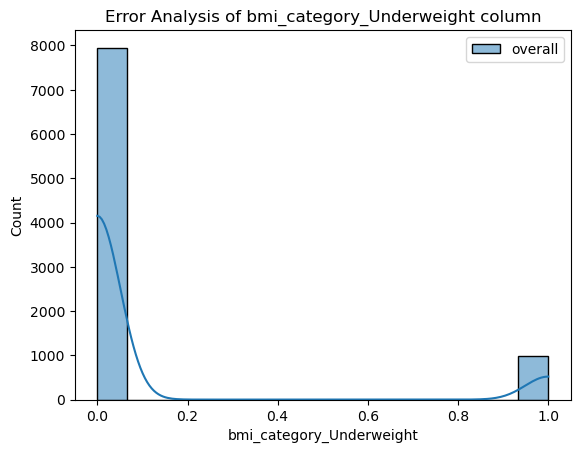

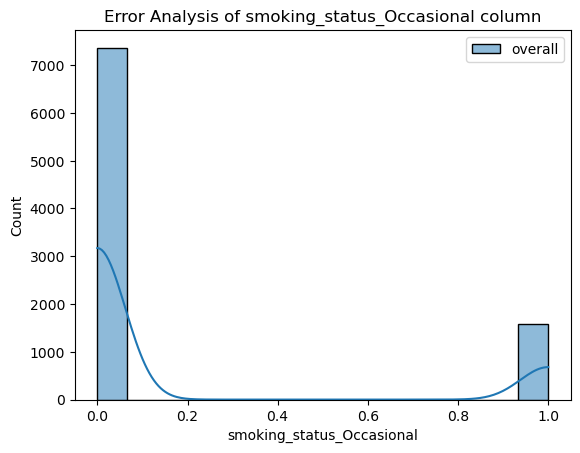

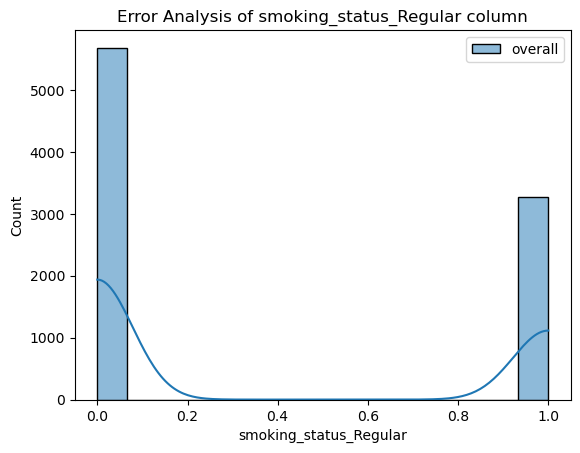

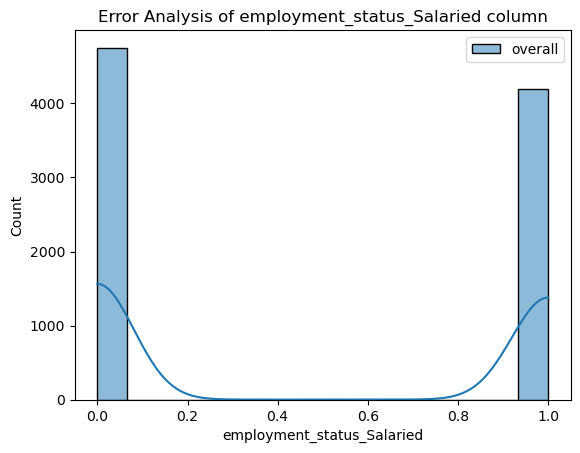

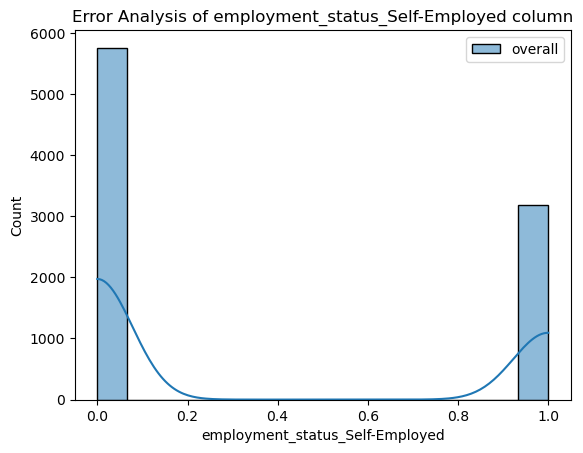

In [99]:
for i in X_test.columns:
    plt.title(f"Error Analysis of {i} column")

    sns.histplot(X_test[i],label='overall',kde=True)
    sns.histplot(extreme_error_df[i],label='extreme error',kde=True)
    plt.legend()
    plt.show()

#### so we can find there is a error is higher in Age column

<Axes: >

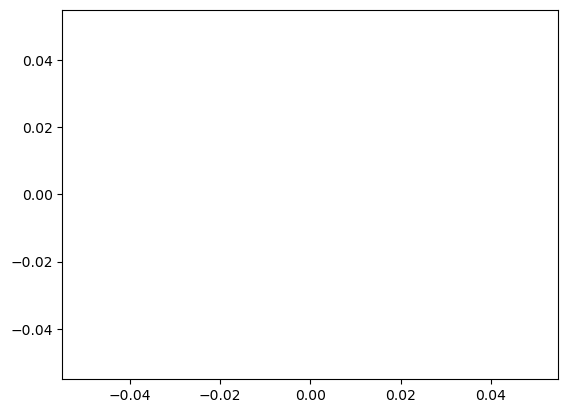

In [100]:
sns.histplot(extreme_error_df['age'])

In [101]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [102]:
extreme_error_df['income_level']=-1

In [103]:
extreme_error_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,income_level


In [104]:
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scalar.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [106]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalised_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [105]:
df_reversed.age.quantile(0.97)

AttributeError: 'DataFrame' object has no attribute 'age'

In [55]:
# model Segmentation

In [ ]:
import os
print(os.getcwd())